# Customer Segmentation Using Clustering
### Project Overview
 This project aims to segment mall customers into distinct groups based on their spending behavior, age, income, and preferences using clustering algorithms. The segmentation will help businesses understand different customer groups and tailor their marketing strategies accordingly.

# Step 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Descriptive Statistics:
       Cust

## Data Cleaning and Initial Visualization


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


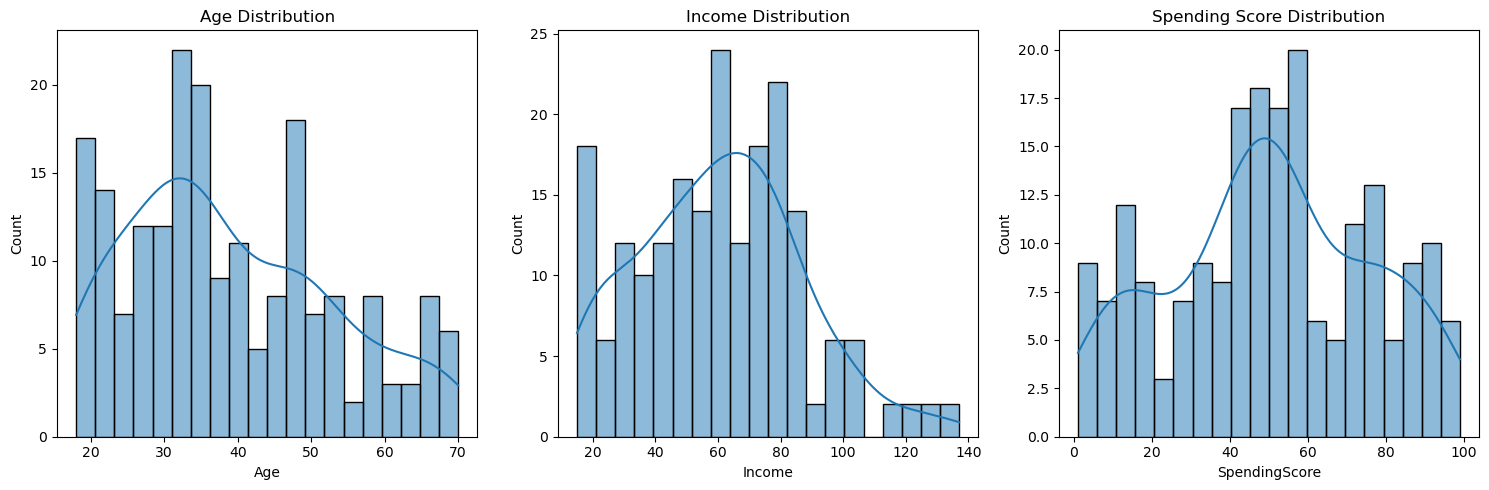

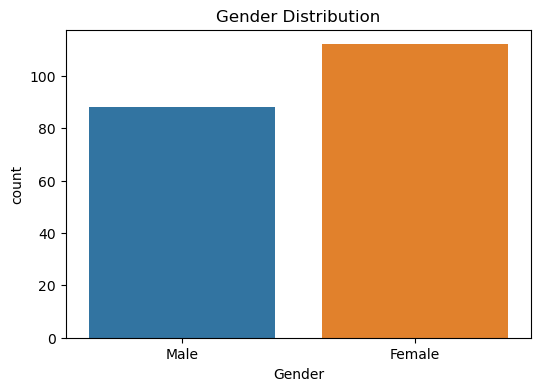

In [2]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Rename columns for easier access
df = df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
})

# Visualize distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['SpendingScore'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Step 2: Feature Selection and Preprocessing

In [3]:
# Select relevant features
X = df[['Age', 'Income', 'SpendingScore']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add gender as a binary feature (optional)
# X['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Step 3: Determining the Optimal Number of Clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

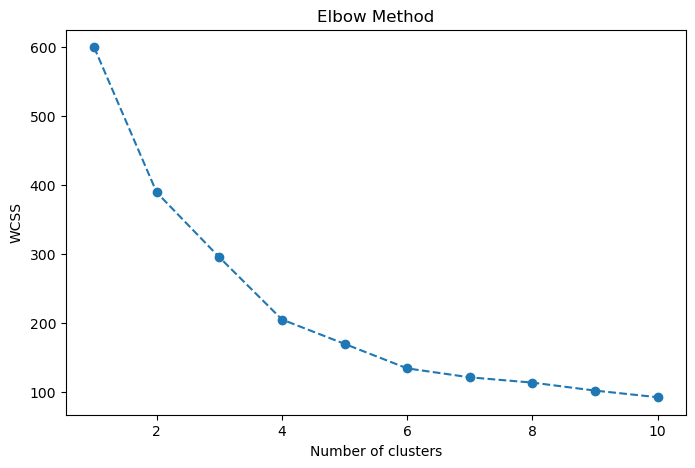

In [4]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Step 4: Applying K-Means Clustering

In [5]:
# Apply K-Means with optimal clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Step 5: Visualizing the Clusters

## 3D Visualization of Clusters

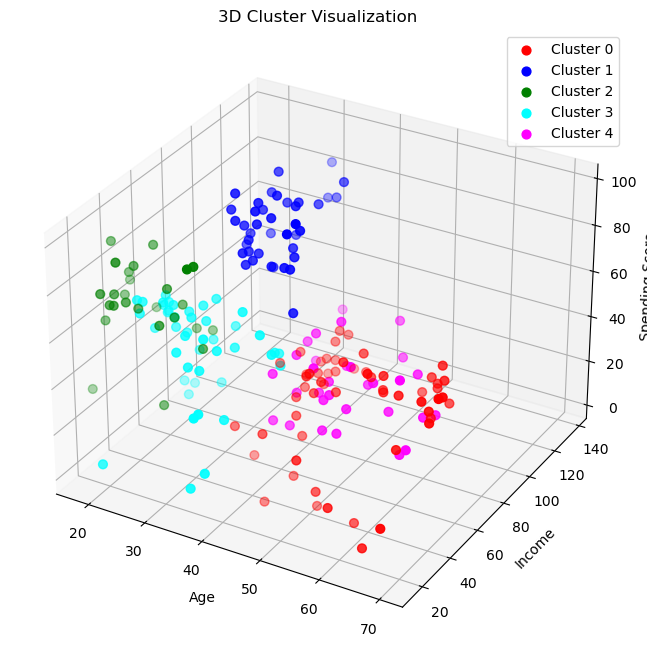

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    ax.scatter(df[df['Cluster'] == i]['Age'], 
               df[df['Cluster'] == i]['Income'], 
               df[df['Cluster'] == i]['SpendingScore'], 
               s=40, color=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')
plt.title('3D Cluster Visualization')
plt.legend()
plt.show()

## Pairplot Visualization

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


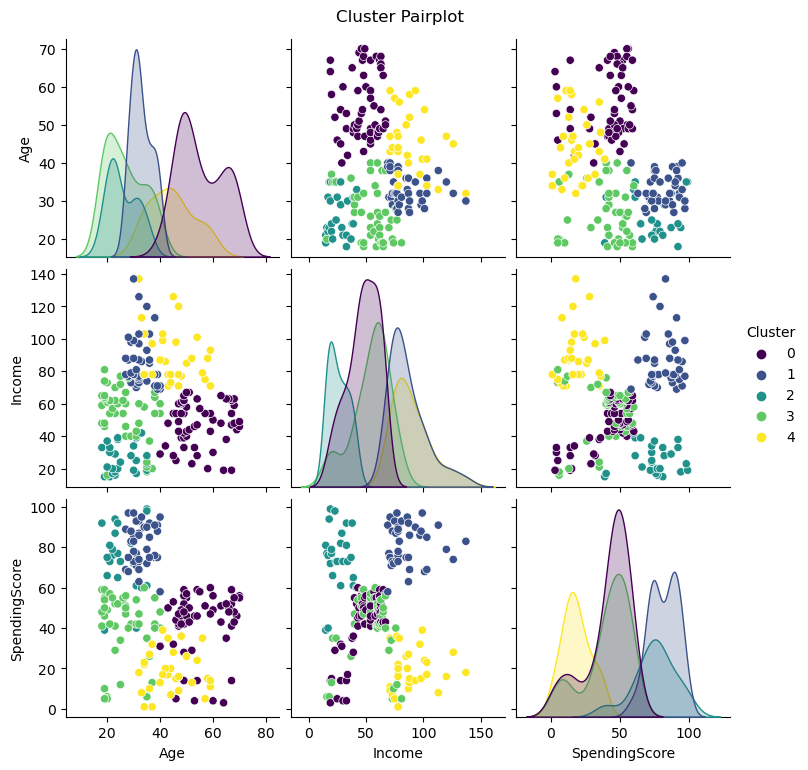

In [7]:
sns.pairplot(df, hue='Cluster', palette='viridis', vars=['Age', 'Income', 'SpendingScore'])
plt.suptitle('Cluster Pairplot', y=1.02)
plt.show()

# Step 6: Analyzing and Interpreting the Clusters


Cluster Characteristics:
           Age  Income  SpendingScore  Gender
Cluster                                      
0        55.28   47.62          41.71  Female
1        32.88   86.10          81.53  Female
2        25.77   26.12          74.85  Female
3        26.73   54.31          40.91  Female
4        44.39   89.77          18.48    Male


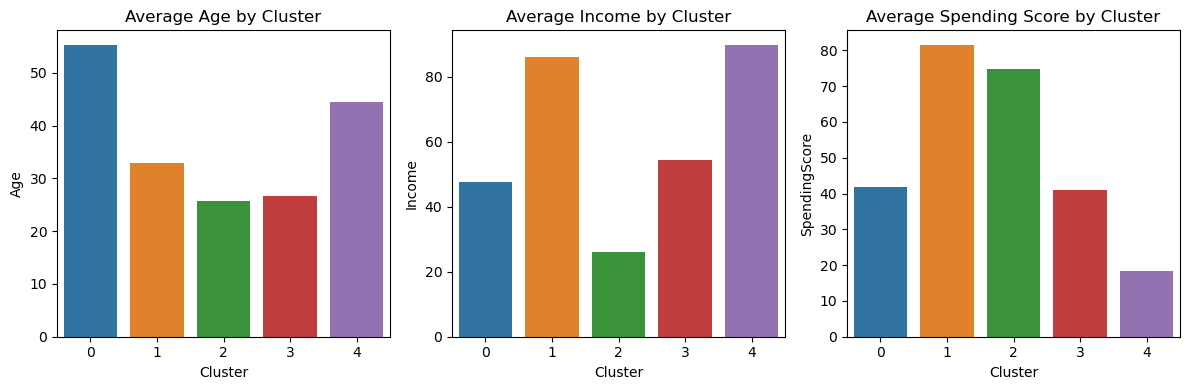

In [8]:
# Cluster analysis
cluster_analysis = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Income': 'mean',
    'SpendingScore': 'mean',
    'Gender': lambda x: x.value_counts().index[0]  # Most common gender
}).round(2)

print("\nCluster Characteristics:")
print(cluster_analysis)

# Visualize cluster means
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.barplot(x=cluster_analysis.index, y='Age', data=cluster_analysis)
plt.title('Average Age by Cluster')

plt.subplot(1, 3, 2)
sns.barplot(x=cluster_analysis.index, y='Income', data=cluster_analysis)
plt.title('Average Income by Cluster')

plt.subplot(1, 3, 3)
sns.barplot(x=cluster_analysis.index, y='SpendingScore', data=cluster_analysis)
plt.title('Average Spending Score by Cluster')

plt.tight_layout()
plt.show()

# Step 7: Business Interpretation
 Based on the cluster analysis, we can interpret the customer segments:

### Cluster 0:
- High income, high spending - Target for premium products and loyalty programs

### Cluster 1:
- Young, moderate income, high spending - Focus on trendy products and social media marketing

### Cluster 2:
- Middle-aged, moderate income, low spending - May need special promotions to increase engagement

### Cluster 3: 
- Young, low income, high spending - Budget-friendly trendy items

### Cluster 4:
- Older, moderate income, low spending - Focus on practical, value-oriented products